<br>

# Introdução

In [1]:
import os
import pandas as pd
import geopandas as gpd
import os
import py7zr
import geopandas as gpd

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [3]:
from paths import *

In [4]:
from zipfile import ZipFile

In [5]:
folder_prefixo = 'Base Cartográfica Vetorial'
file = [x for x in os.listdir(bruto_path) if x.startswith(folder_prefixo)][0]
file

'Base Cartográfica Vetorial-20220405T193017Z-001.zip'

In [6]:
zipfile_path = os.path.join(bruto_path, file)

In [7]:
with ZipFile(zipfile_path, 'r') as zip_obj:
    # Extract all the contents of zip file in different directory
    zip_obj.extractall(input_path)

In [8]:
aaa = os.path.join(input_path, folder_prefixo)
aaa

'../data/input/Base Cartográfica Vetorial'

In [9]:
for root, dirs, files in os.walk(aaa, topdown = False):
    print(root)
    for name in files:
        print('> ', format(os.path.join(name)))
    for name in dirs:
        print(os.path.join(name))

../data/input/Base Cartográfica Vetorial/Geologia (CPRM, 2006)
>  apacp-geologico_shp.zip
../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)
>  app-hidrica-apa.kml
>  app-hidrica.kml
>  app-hidrica_shp.zip
>  hidrografia-dupla.kml
>  hidrografia-simples.kml
>  nascente.kml
>  Projeto de Apoio à Implementação do CAR.doc
>  represa.kml
../data/input/Base Cartográfica Vetorial/Inventário Florestal 2020 (Instituto Florestal, 2020)
>  apacp-mun_if20.kml
>  apacp-mun_if20_s2000.rar
>  apacp_if20.kml
>  apacp_if20_s2000.rar
>  apac_if20.kml
>  apac_if20_s2000.rar
>  apap_if20.kml
>  apap_if20_s2000.rar
../data/input/Base Cartográfica Vetorial/Limites/Bases vetoriais limites APA Corumbataí/Shapefile - Sirgas 2000
>  apac_Pol_sirgas2000.prj
>  apac_Pol_sirgas2000.qpj
>  apac_Pol_sirgas2000.shp
>  apac_Pol_sirgas2000.shx
../data/input/Base Cartográfica Vetorial/Limites/Bases vetoriais limites APA Corumbataí
>  apac_Pol_sirgas2000.kml
Shapefile - Sirgas 2000
../data/i

<br>

# APA Corumbataí

In [10]:
def drop_columns(gdf):
    list_cols = gdf.columns
    for col in list_cols:
        if col != 'geometry':
            content_col = list(set(gdf[col]))
            if len(content_col)==1:
                print(content_col)
                gdf.drop([col], axis=1, inplace=True)

<br>

## Limites

In [11]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Limites',
        'Bases vetoriais limites APA Corumbataí',
        'Shapefile - Sirgas 2000',
    )
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_limite.gpkg'),
    layer='Limite',
    driver='GPKG'
)

epsg:4674


,geometry
0,"MULTIPOLYGON (((-48.42444 -22.58769, -48.42449..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Zona de Proteção Aquífera (ZPA)

In [12]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Zona de Proteção Aquífera (ZPA)',
        #'Bases vetoriais limites APA Corumbataí',
        #'Shapefile - Sirgas 2000',
    )
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_zpa.gpkg'),
    layer='Zona de Proteção Aquífera (ZPA)',
    driver='GPKG'
)

epsg:4674
[None]
[None]
[None]
[None]
[None]
[None]
[0]
[None]
[None]
[None]
[None]
[None]
[None]


,area_ha,geometry
0,118.947,"POLYGON ((-48.42525 -22.58684, -48.42527 -22.5..."
1,128.093,"POLYGON ((-47.51033 -22.26735, -47.51069 -22.2..."
2,221771.026,"MULTIPOLYGON (((-47.73639 -22.45076, -47.74682..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Zona de Proteção Hídrica (ZPH)

In [13]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Zona de Proteção Hídrica (ZPH)',
        #'Bases vetoriais limites APA Corumbataí',
        #'Shapefile - Sirgas 2000',
    )
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_zph.gpkg'),
    layer='Zona de Proteção Hídrica (ZPH)',
    driver='GPKG'
)

epsg:4674
[None]
[111756.12824]


,geometry
0,"MULTIPOLYGON (((-47.79757 -22.25599, -47.79819..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Zona de Vida Silvestre (ZVS)

In [14]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Zona de Vida Silvestre (ZVS)',
        #'Bases vetoriais limites APA Corumbataí',
        #'Shapefile - Sirgas 2000',
    ),
)
gdf['LEG_MAPA'] = gdf['LEG_MAPA'].str.replace('ma��', 'maçã')
gdf['LEG_MAPA'] = gdf['LEG_MAPA'].str.replace('Arb�', 'Arbó')
gdf['LEG_MAPA'] = gdf['LEG_MAPA'].str.replace('V�r', 'Vár')
gdf['LEG_MAPA'] = gdf['LEG_MAPA'].str.replace('gi�o', 'gião')

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_zvs.gpkg'),
    layer='Zona de Vida Silvestre (ZVS)',
    driver='GPKG'
)

epsg:4674


,LEG_MAPA,AREA,area_ha,geometry
0,Formação Arbórea / Arbustiva em Região de Várzea,2.61,2.64087,"POLYGON ((-47.91239 -22.19084, -47.91243 -22.1..."
1,Formação Arbórea / Arbustiva em Região de Várzea,0.64,0.64689,"POLYGON ((-47.87815 -22.19561, -47.87787 -22.1..."
2,Formação Arbórea / Arbustiva em Região de Várzea,2.72,2.74570,"POLYGON ((-47.83974 -22.20013, -47.84020 -22.2..."
3,Formação Arbórea / Arbustiva em Região de Várzea,1.08,1.09228,"POLYGON ((-47.81569 -22.20162, -47.81691 -22.2..."
4,Formação Arbórea / Arbustiva em Região de Várzea,65.80,66.50063,"POLYGON ((-47.84345 -22.19775, -47.84324 -22.1..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Vegetação Natural: mun

In [15]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Vegetação natural 2019 (Mapbiomas2020, coleção 5)',
        'apacp_munic+buf2km_veg-nat_mapbiomas2019-colecao5_shapefile_wgs84.zip',
        #'Shapefile - Sirgas 2000',
    )
)

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_veg_mun.gpkg'),
    layer='Vegetação Natural - Município (MapBiomas - Coleção 5)',
    driver='GPKG'
)

epsg:4326
[1]


,ID,geometry
0,1,"POLYGON ((-47.85631 -21.57951, -47.85685 -21.5..."
1,2,"POLYGON ((-47.85308 -21.58247, -47.85361 -21.5..."
2,3,"POLYGON ((-47.85308 -21.58247, -47.85281 -21.5..."
3,4,"POLYGON ((-47.85631 -21.58517, -47.85631 -21.5..."
4,5,"POLYGON ((-47.85631 -21.58517, -47.85631 -21.5..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Vegetação Natural: reg

In [16]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Vegetação natural 2019 (Mapbiomas2020, coleção 5)',
        'apacp_regional_veg-nat_mapbiomas2019-colecao5_shapefile_wgs84.zip',
        #'Shapefile - Sirgas 2000',
    )
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_veg_reg.gpkg'),
    layer='Vegetação Natural - Regional (MapBiomas - Coleção 5)',
    driver='GPKG'
)

epsg:4326


,ID,GRIDCODE,geometry
0,1,3,"POLYGON ((-47.99942 -21.30714, -47.99969 -21.3..."
1,2,3,"POLYGON ((-47.99996 -21.30740, -48.00023 -21.3..."
2,3,3,"POLYGON ((-48.00104 -21.30794, -48.00131 -21.3..."
3,4,3,"POLYGON ((-48.00185 -21.30821, -48.00185 -21.3..."
4,5,3,"POLYGON ((-48.00185 -21.30821, -48.00185 -21.3..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Uso Solo: mun

epsg:4326


,ID,GRIDCODE,geometry
0,1,15,"POLYGON ((-47.85577 -21.57924, -47.85604 -21.5..."
1,2,3,"POLYGON ((-47.85631 -21.57951, -47.85685 -21.5..."
2,3,21,"POLYGON ((-47.85577 -21.57951, -47.85631 -21.5..."
3,4,3,"POLYGON ((-47.85523 -21.58059, -47.85577 -21.5..."
4,5,4,"POLYGON ((-47.85469 -21.58059, -47.85523 -21.5..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


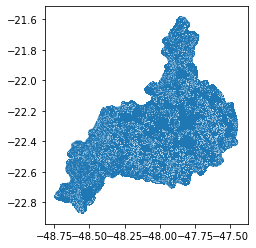

In [17]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Uso do Solo 2019 (Mapbiomas2020, coleção 5)',
        'apacp_munic+buf2km_uso-solo-mapbiomas2019-colecao5_wgs84.zip',
        #'Shapefile - Sirgas 2000',
    )
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.plot()
gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_veg_mun.gpkg'),
    layer='Uso Solo - Município (MapBiomas - Coleção 5)',
    driver='GPKG'
)

## Uso Solo: reg

In [18]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Uso do Solo 2019 (Mapbiomas2020, coleção 5)',
        'apacp_regional_uso-solo_mapbiomas2019-colecao5_wgs84.zip',
        #'Shapefile - Sirgas 2000',
    )
)

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_uso_reg.gpkg'),
    layer='Uso Solo - Regional (MapBiomas - Coleção 5)',
    driver='GPKG'
)

epsg:4326


,ID,GRIDCODE,geometry
0,1,21,"POLYGON ((-47.99781 -21.30660, -47.99862 -21.3..."
1,2,21,"POLYGON ((-47.99915 -21.30687, -47.99915 -21.3..."
2,3,21,"POLYGON ((-47.99700 -21.30687, -47.99727 -21.3..."
3,4,3,"POLYGON ((-47.99942 -21.30714, -47.99969 -21.3..."
4,5,21,"POLYGON ((-47.99942 -21.30714, -47.99942 -21.3..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<br>

## Pedologia, errado!

In [19]:
# gdf = gpd.read_file(
#     os.path.join(
#         '../data/input/Base Cartográfica Vetorial/Pedologia (Instituto Florestal, 2017)',
#         'apacp_pedologico_rossi2017_s2000.zip',
#         #'Shapefile - Sirgas 2000',
#     )
# )
# gdf = gdf.set_crs(22523)
# print(gdf.crs)
# gdf = gdf.to_crs(epsg=4326)

# #gdf.plot()
# drop_columns(gdf)
# display(gdf.head())

# gdf.to_file(
#     os.path.join(output_path_gpkg, 'apa_corumbatai_pedologia.gpkg'),
#     layer='Pedologia (Rossi, 2017)',
#     driver='GPKG'
# )

<br>

## Geologia

In [20]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Geologia (CPRM, 2006)',
        'apacp-geologico_shp.zip',
        #'Shapefile - Sirgas 2000',
    )
)

gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('Itarar�', 'Itararé')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('b�sicas', 'básicas')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('Piramb�ia', 'Pirambóia')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('Dep�sitos', 'Depósitos')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('col�vio-eluvionares', 'colúvio-aluvionares')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('Corumbata�', 'Corumbataí')
gdf['NOME_UNIDA'] = gdf['NOME_UNIDA'].str.replace('Tatu�', 'Tatuí')

gdf['HIERARQUIA'] = gdf['HIERARQUIA'].str.replace('Forma��o', 'Formação')
gdf['ERA_MAXIMA'] = gdf['ERA_MAXIMA'].str.replace('z�ico', 'zóico')

gdf['PERIOD_MAX'] = gdf['PERIOD_MAX'].str.replace('Jur�', 'Jurá')
gdf['PERIOD_MAX'] = gdf['PERIOD_MAX'].str.replace('arbon�fer', 'arbonífer')
gdf['PERIOD_MAX'] = gdf['PERIOD_MAX'].str.replace('Cret�ceo', 'Cretáceo')

gdf['MET_ID_MAX'] = gdf['MET_ID_MAX'].str.replace('Isot�pico Radiog�nico', 'Isotópico Radiogênico')
gdf['MET_ID_MAX'] = gdf['MET_ID_MAX'].str.replace('Estratigr�fico', 'Estratigráfico')

gdf['MET_DAT_MA'] = gdf['MET_DAT_MA'].str.replace('Rela��es', 'Relações')
gdf['MET_DAT_MA'] = gdf['MET_DAT_MA'].str.replace('Palinol�gico', 'Palinológico')

gdf['ERA_MINIMA'] = gdf['ERA_MINIMA'].str.replace('z�ico', 'zóico')

gdf['PERIODO_MI'] = gdf['PERIODO_MI'].str.replace('Tri�ssico', 'Triássico')
gdf['PERIODO_MI'] = gdf['PERIODO_MI'].str.replace('Cret�ceo', 'Cretáceo')

gdf['MET_DAT_MI'] = gdf['MET_DAT_MI'].str.replace('Rela��es', 'Relações')
gdf['MET_DAT_MI'] = gdf['MET_DAT_MI'].str.replace('Palinol�gico', 'Palinológico')

gdf['MET_ID_MIN'] = gdf['MET_ID_MIN'].str.replace('Paleontol�gico', 'Paleontológico')
gdf['MET_ID_MIN'] = gdf['MET_ID_MIN'].str.replace('Isot�pico', 'Isotópico')
gdf['MET_ID_MIN'] = gdf['MET_ID_MIN'].str.replace('Radiog�nico', 'Radiogênico')
gdf['MET_ID_MIN'] = gdf['MET_ID_MIN'].str.replace('Estratigr�fico', 'Estratigráfico')

gdf['SISTSED'] = gdf['SISTSED'].str.replace('Carbon�tico', 'Carbonático')
gdf['SISTSED'] = gdf['SISTSED'].str.replace('Entrela�ado', 'Entrelavado')
gdf['SISTSED'] = gdf['SISTSED'].str.replace('Carbon�tico', 'Carbonático')
gdf['SISTSED'] = gdf['SISTSED'].str.replace('Des�rtico', 'Desértico')
gdf['SISTSED'] = gdf['SISTSED'].str.replace('Carbon�tica', 'Carbonática')
# Tem mais #TODO

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_geologia.gpkg'),
    layer='Geologia (CPRM, 2006)',
    driver='GPKG'
)

epsg:4674
['Faneroz�ico']
['Faneroz�ico']
[None]
[None]
[None]
[None]


,OBJECTID,SIGLA_UNID,NOME_UNIDA,HIERARQUIA,IDADE_MAX,ERRO_MAX,ERA_MAXIMA,PERIOD_MAX,EPOCA_MAX,MET_ID_MAX,...,CLASSE_RX2,SUBCLA_RX1,SUBCLA_RX2,REF_ID_MAX,REF_ID_MIN,SHAPE_Leng,area_apa,Shape_Le_1,Shape_Area,geometry
0,1,C2P1i,Itararé,Grupo,318.0,0.0,Paleozóico,Carbonífero,Pensilvaniano,Paleontol�gico,...,None,Cl�stica,None,Daemon e Quadros (1970),Daemon e Quadros (1970),0.39545,627.016611,14076.015642,6.270166e+06,"POLYGON ((-47.63968 -22.50304, -47.63974 -22.5..."
1,2,K1_delta_sg,"Serra Geral, intrusivas básicas",Formação,131.9,0.4,Mesozóico,Cretáceo,Inferior,Isotópico Radiogênico,...,�gnea,Plut�nica,Plut�nica,Ernesto et al. (1999),Turner et al. (1994),0.02664,56.479359,2864.514088,5.647936e+05,"POLYGON ((-47.64243 -22.25851, -47.64396 -22.2..."
2,3,K1_beta_sg,Serra Geral,Formação,138.4,1.3,Mesozóico,Cretáceo,Inferior,Isotópico Radiogênico,...,None,Vulc�nica,None,Turner et al. (1994),Stewart et al. (1996),0.12248,56.215007,5917.649508,5.621501e+05,"MULTIPOLYGON (((-47.56839 -22.17651, -47.56842..."
3,4,P1tt,Tatuí,Formação,294.0,0.0,Paleozóico,Permiano,Cisuraliano,Paleontol�gico,...,Sedimentar (ou Sedimentos),Cl�stica,"Cl�stica, Qu�mica",Daemon e Quadros (1970),Daemon e Quadros (1970),1.13184,908.917850,19609.846456,9.089178e+06,"POLYGON ((-47.65319 -22.45788, -47.65023 -22.4..."
4,5,K1_delta_sg,"Serra Geral, intrusivas básicas",Formação,131.9,0.4,Mesozóico,Cretáceo,Inferior,Isotópico Radiogênico,...,�gnea,Plut�nica,Plut�nica,Ernesto et al. (1999),Turner et al. (1994),0.11265,311.399869,12003.973458,3.113999e+06,"POLYGON ((-47.64808 -22.45094, -47.65319 -22.4..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [21]:
for col in gdf.columns:
    print('>> {}'.format(col))
    try:
        print(set(gdf[col]))
    except:
        pass

>> OBJECTID
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81}
>> SIGLA_UNID
{'K1_beta_sg', 'P1tt', 'P2i', 'Qce', 'K1_delta_sg', 'P3T1p', 'J3K1bt', 'K2Eit', 'Q2a', 'P3T1c', 'C2P1i', 'ENrc'}
>> NOME_UNIDA
{'Itararé', 'Depósitos colúvio-aluvionares', 'Irati', 'Corumbataí', 'Rio Claro', 'Itaqueri', 'Tatuí', 'Depósitos aluvionares', 'Botucatu', 'Serra Geral, intrusivas básicas', 'Serra Geral', 'Pirambóia'}
>> HIERARQUIA
{'Unidade', 'Grupo', 'Formação'}
>> IDADE_MAX
{96.0, 65.0, 1.8, 131.9, 260.0, 294.0, 138.4, 0.01, 154.0, 318.0}
>> ERRO_MAX
{0.0, 0.4, 1.3}
>> ERA_MAXIMA
{'Cenozóico', 'Mesozóico', 'Paleozóico'}
>> PERIOD_MAX
{'Jurássico', 'Carbonífero', 'Neogeno', 'Cretáceo', 'Paleogeno', 'Permiano'}
>> EPOCA_MAX
{'Pleistoceno', 'Lonpingiano', 'Cisurali

<br>

## Hidrografia

In [22]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'hidrografia-simples.kml',
    ),
    driver='KML'
)

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_hidro_simples.gpkg'),
    layer='Hidrologia - Simples (FBDS, 2016)',
    driver='GPKG'
)

epsg:4326
['']
['']


,geometry
0,"MULTILINESTRING ((-48.72709 -22.76119, -48.727..."
1,"MULTILINESTRING ((-48.72632 -22.76365, -48.726..."
2,"MULTILINESTRING ((-48.72484 -22.76484, -48.725..."
3,"MULTILINESTRING ((-48.72316 -22.75797, -48.723..."
4,"MULTILINESTRING ((-48.72448 -22.76510, -48.724..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [23]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'hidrografia-dupla.kml',        
    ),
    driver='KML'
)

print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_hidro_dupla.gpkg'),
    layer='Hidrologia - Dupla (FBDS, 2016)',
    driver='GPKG'
)

epsg:4326
['']
['']


,geometry
0,"MULTIPOLYGON (((-47.66189 -22.13395, -47.66190..."
1,"MULTIPOLYGON (((-48.64135 -22.48191, -48.64134..."
2,"MULTIPOLYGON (((-47.98742 -22.44973, -47.98746..."
3,"MULTIPOLYGON (((-47.74986 -22.46408, -47.74981..."
4,"MULTIPOLYGON (((-47.67374 -22.33300, -47.67366..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [24]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'nascente.kml',        
    ),
    driver='KML'
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

#gdf.plot()
drop_columns(gdf)
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_hidro_nascente.gpkg'),
    layer='Hidrologia - Nascente (FBDS, 2016)',
    driver='GPKG'
)

epsg:4326
['']
['']


,geometry
0,POINT Z (-47.79064 -22.13912 776.54080)
1,POINT Z (-47.78729 -22.09994 948.05500)
2,POINT Z (-47.78708 -22.12605 774.84910)
3,POINT Z (-47.78634 -22.10874 916.29900)
4,POINT Z (-47.78624 -22.10560 926.54700)


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


epsg:4326
['']
['']


,geometry
0,"MULTIPOLYGON (((-47.71338 -22.22567, -47.71343..."
1,"MULTIPOLYGON (((-47.71261 -22.22401, -47.71268..."
2,"MULTIPOLYGON (((-47.72147 -22.22198, -47.72150..."
3,"MULTIPOLYGON (((-47.71308 -22.22185, -47.71315..."
4,"MULTIPOLYGON (((-47.71800 -22.21893, -47.71810..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


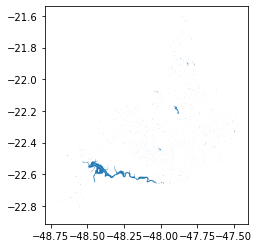

In [25]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'represa.kml',        
    ),
    driver='KML'
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

drop_columns(gdf)
gdf.plot()
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_hidro_represa.gpkg'),
    layer='Hidrologia - Represa (FBDS, 2016)',
    driver='GPKG'
)

<br>

## APP

epsg:4326
['']
['']


,geometry
0,"MULTIPOLYGON (((-47.71284 -22.22410, -47.71276..."
1,"MULTIPOLYGON (((-47.64784 -22.19315, -47.64819..."
2,"MULTIPOLYGON (((-47.78367 -22.14731, -47.78356..."
3,"MULTIPOLYGON (((-47.71393 -22.22792, -47.71412..."
4,"MULTIPOLYGON (((-48.03188 -22.50635, -48.03207..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


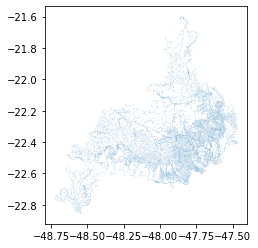

In [26]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'app-hidrica.kml',        
    ),
    driver='KML'
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

drop_columns(gdf)
gdf.plot()
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_app.gpkg'),
    layer='APP',
    driver='GPKG'
)

epsg:4326
['']
['']


,geometry
0,"MULTIPOLYGON (((-47.71284 -22.22410, -47.71276..."
1,"MULTIPOLYGON (((-47.64784 -22.19315, -47.64819..."
2,"MULTIPOLYGON (((-47.78367 -22.14731, -47.78356..."
3,"MULTIPOLYGON (((-47.71393 -22.22792, -47.71412..."
4,"MULTIPOLYGON (((-48.03188 -22.50635, -48.03207..."


/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


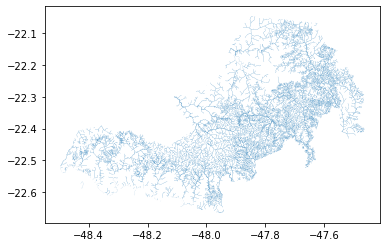

In [27]:
gdf = gpd.read_file(
    os.path.join(
        '../data/input/Base Cartográfica Vetorial/Hidrografia e APP Hídrica (FBDS, 2016)',
        'app-hidrica-apa.kml',        
    ),
    driver='KML'
)
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)

drop_columns(gdf)
gdf.plot()
display(gdf.head())

gdf.to_file(
    os.path.join(output_path_gpkg, 'apa_corumbatai_app_apa.gpkg'),
    layer='APP_APA',
    driver='GPKG'
)

<br>

# Compress

In [28]:
list_files = os.listdir(output_path_gpkg)
list_files

['apa_corumbatai_app.gpkg',
 'apa_corumbatai_app_apa.gpkg',
 'apa_corumbatai_geologia.gpkg',
 'apa_corumbatai_hidro_dupla.gpkg',
 'apa_corumbatai_hidro_nascente.gpkg',
 'apa_corumbatai_hidro_represa.gpkg',
 'apa_corumbatai_hidro_simples.gpkg',
 'apa_corumbatai_limite.gpkg',
 'apa_corumbatai_uso_reg.gpkg',
 'apa_corumbatai_veg_mun.gpkg',
 'apa_corumbatai_veg_reg.gpkg',
 'apa_corumbatai_zpa.gpkg',
 'apa_corumbatai_zph.gpkg',
 'apa_corumbatai_zvs.gpkg']

In [29]:
from paths import *

In [30]:
for file in list_files:
    # File
    filename = file.split('.', maxsplit=1)[0]
    print(filename)

    # Paths
    zip7_filepath = os.path.join(output_path_zips, '{}.7z'.format(filename))
    gpkg_filepath = os.path.join(output_path_gpkg, file)

    # Write 7zip
    with py7zr.SevenZipFile(zip7_filepath, 'w') as archive:
        archive.write(gpkg_filepath, os.path.basename(gpkg_filepath))

apa_corumbatai_app
apa_corumbatai_app_apa
apa_corumbatai_geologia
apa_corumbatai_hidro_dupla
apa_corumbatai_hidro_nascente
apa_corumbatai_hidro_represa
apa_corumbatai_hidro_simples
apa_corumbatai_limite
apa_corumbatai_uso_reg
apa_corumbatai_veg_mun
apa_corumbatai_veg_reg
apa_corumbatai_zpa
apa_corumbatai_zph
apa_corumbatai_zvs
